# Introduction


For our machine learning project, our goal is to use an existing dataset and perform clustering using unsupervised machine learning methods to obtain different insights from the dataset that relate to how we can categorize foods. There isn’t a specific insight we hope to find, rather we plan to use parameter tuning to explore what possible insights can be gathered from the raw data that may teach us something new or provoke new questions regarding food nutrition. The dataset we plan to perform unsupervised learning on contains raw data on nutritional metrics of many different foods (including calories, carbohydrates, sugars etc.). 

# Data Description


The dataset that will be used for this project is available publicly online and is provided in the format of a csv file (link to dataset: https://corgis-edu.github.io/corgis/csv/food/) [1]. The dataset comes from the ‘CORGIS Datasets Project’ which is described to be ‘The Collection of Really Great, Interesting, Situated Datasets’.  The specific data in the dataset was sourced from the ‘United States Department of Agriculture’s Food Composition Database’. 

The dataset consists of 7083 records/rows and provides nutritional information on a mix of foods and beverages. There are 38 columns/features present in the dataset. The features of the dataset include both numerical and categorical data which are represented in the form of strings for categorical data, and integers and floats for numerical data. Each of the numeric features represent the quantity of a certain attribute within 100 grams of the food listed in the “Description” column. In table 1, all the features from the dataset are presented along with information regarding the data type they hold and an example value.


#### Import Statements

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### Import Dataset

Read data from local CSV file in current folder, and store it to 'food' dataframe

In [41]:
food = pd.read_csv('food.csv') 
food 


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,Tomatoes as ingredient in omelet,Tomatoes as ingredient in omelet,99997802,103,464,0,5.48,0,7.4,1.6,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,Other vegetables as ingredient in omelet,Other vegetables as ingredient in omelet,99997804,1,11,0,4.81,0,19.4,1.4,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,Vegetables as ingredient in curry,Vegetables as ingredient in curry,99997810,368,994,0,11.60,0,14.6,2.2,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,Sauce as ingredient in hamburgers,Sauce as ingredient in hamburgers,99998130,0,194,4,17.14,13,20.0,0.6,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


#### Feature Engineering

Omit data description columns:
Specifically, remove the columns 'Category', 'Description', and 'Nutrient Data Bank Number' because Description and Category are labels and Nutrient Data Bank Number is unique for every row. 

In [42]:
food = food[food.columns[3:]]
food

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0,7,0,6.89,14,16.0,0.0,0,0,0.177,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,0,4,0,4.87,8,17.9,0.0,0,0,0.110,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,0,7,0,4.46,14,16.0,0.0,0,0,0.043,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,0,7,0,4.67,12,17.8,0.0,0,0,0.105,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,103,464,0,5.48,0,7.4,1.6,142,2597,0.637,...,30,278,6,0.21,43,0.00,0.104,18.2,0.60,8.8
7079,1,11,0,4.81,0,19.4,1.4,18,0,3.678,...,96,364,6,0.58,1,0.04,0.123,6.3,0.03,0.4
7080,368,994,0,11.60,0,14.6,2.2,225,458,0.773,...,46,312,19,0.28,98,0.00,0.177,16.2,0.24,8.9
7081,0,194,4,17.14,13,20.0,0.6,112,7237,0.917,...,33,190,845,0.21,21,0.04,0.104,2.5,1.90,50.8


#### Data Transformation

Now we standardize our data using 'StandardScaler' in order to reduce the range between values from different features (since some features have very high values and others have very low values). This will bring the numeric values of our different features closer together which will help with our PCA operations in the next section.

In [43]:
#Define the scaler object
scaler = StandardScaler()
#Use the scaler object to normalize the dataset
food_scaled = scaler.fit_transform(food)

#### Data Cleaning

Upon analyzing our data, we did not see any requirements for data cleaning, since all rows have some permitted value (non-negative numeric) for every feature.

In the below code, we obtain the amount of '0' values within each column. 

In [44]:
countZeroes = (food == 0).sum()
countZeroes

Data.Alpha Carotene               5180
Data.Beta Carotene                2283
Data.Beta Cryptoxanthin           5011
Data.Carbohydrate                  430
Data.Cholesterol                  2443
Data.Choline                       190
Data.Fiber                        1642
Data.Lutein and Zeaxanthin        2235
Data.Lycopene                     6033
Data.Niacin                        165
Data.Protein                       202
Data.Retinol                      2650
Data.Riboflavin                    169
Data.Selenium                      253
Data.Sugar Total                   663
Data.Thiamin                       217
Data.Water                          18
Data.Fat.Monosaturated Fat         336
Data.Fat.Polysaturated Fat         300
Data.Fat.Saturated Fat             322
Data.Fat.Total Lipid               228
Data.Major Minerals.Calcium        137
Data.Major Minerals.Copper         116
Data.Major Minerals.Iron           168
Data.Major Minerals.Magnesium      121
Data.Major Minerals.Phosp

Let's look at all features which have more than 50% of the rows (3542 rows). The only three features with more than 3542 rows containing a '0' value are 'Alpha Carotene', 'Beta Cryptoxanthin', and 'Lycopene'. 

According to National Library of Medicine [2] red fruits and vegetables are very high in lycopene. Thus we should keep this feature in our dataset because it may help our K-means algorithm cluster red fruits and vegetables better.

According to Louis Bonduelle Foundation [3] many vegetables are high in alpha-carotene. So we should also keep this feature in our dataset because can help cluster our data to look for vegetables better.

According to National Library of Medicine [4] orange foods like oranges, tangerines, and persimmons contain beta-cryptoxantin. Therefore we should keep this feature in our dataset as it may help with clustering for these orange foods.

#### Exploratory Data Analysis 

Based on the dimensions of the food dataset we see that it contains 7083 rows/entries each of which has 35 features. 

In [45]:
food.shape

(7083, 35)

Below is a heatmap for all non-omitted features in our dataset, where intensities are given for each pair of features based on their correlation. On the heatmap, we can see apart from the diagonal (which is comparing features with themselves) there are a few moderate to highly correlated features both positively and negatively correlated such as Water and Carbohydrate.

Heatmaps are useful for preliminary analysis because it gives a compact visual representation of relationships between features which can help us get a better idea of what to expect as we work with our data.

(Note: The font size is small due to the large amount of features required for comparison in map)

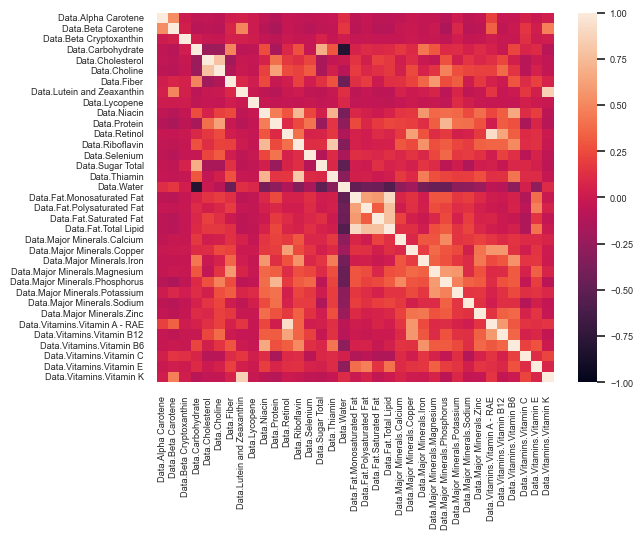

In [46]:
sns.set(font_scale=0.6)
heatMap = sns.heatmap(food.corr(), vmin=-1, vmax=1) # Create a heatmap with correlation values between -1 and 1 


We define a moderate to high correlation to have values between 0.75 and 1, we omit anything with value 1 to avoid outputting the diagonal values of the heat map (which are features being compared to themselves).

In [47]:
food_temp = food.corr()

s = set()
for index, row in food_temp.iterrows():
    for i, x in enumerate(row):
        if abs(x) >= 0.75 and abs(x)!=1:
            s.add(tuple(sorted([food.columns[0:][i], index, str(round(x, 2))])))

for x in s:
    print(x)


('0.9', 'Data.Fat.Monosaturated Fat', 'Data.Fat.Total Lipid')
('0.93', 'Data.Retinol', 'Data.Vitamins.Vitamin A - RAE')
('0.85', 'Data.Lutein and Zeaxanthin', 'Data.Vitamins.Vitamin K')
('0.79', 'Data.Cholesterol', 'Data.Choline')
('0.82', 'Data.Riboflavin', 'Data.Thiamin')
('0.77', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Total Lipid')
('0.78', 'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid')
('-0.81', 'Data.Carbohydrate', 'Data.Water')


From above, we can see 8 pairs of features which have a high correlation (with absolute values between 0.75 and 1)

# Machine Learning

#### PCA

To start, we'll determine the optimal number of dimensions that PCA will reduce our dataset to using a variance curve. We aim to maintain 99% of the variance. Reducing the number of dimensions will reduce the runtime when it comes time to use K-Means clustering. 

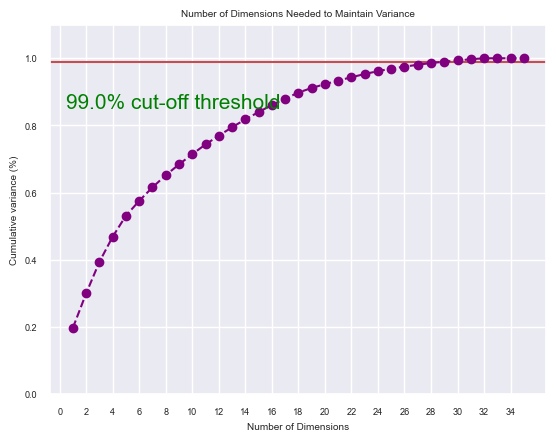

In [48]:
#Fitting PCA onto our food_scaled dataframe and computing variance ratios
pca = PCA().fit(food_scaled)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)

#Defining the axes
xi = np.arange(1, len(variance_ratio)+1, step=1)
y = np.cumsum(variance_ratio)

#Defining the Plot
plt.xticks(np.arange(0, 36, step=2)) 
plt.ylim(0.0,1.1)
plt.axhline(y = 0.99, color='r', linestyle='-')
plt.plot(xi, y, marker='o', linestyle='--', color='purple')
plt.text(0.5, 0.85, f'{100*0.99}% cut-off threshold', color = 'green', fontsize=15)
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Dimensions Needed to Maintain Variance')

#Displaying the plot
plt.show()

Based on the variance curve above, in order to maintain 99% of the variance, we must reduce our dataset to a minimum of 29 dimensions. this indicates that there is low linear correlation between features and that we won't save much runtime for K-Means using PCA since we only omit 6 dimensions. Nevertheless, we now apply PCA reducing our dataset to 29.

In [49]:
#Define PCA object for scaling down to 29 dimensions
pca = PCA(n_components=29)
#Fit food_scaled dataframe to 29 dimensions using the PCA object
food_pca_29 = pca.fit_transform(food_scaled)

#View new dataframe's dimensions to confirm only 29 columns
food_pca_29.shape

(7083, 29)

#### K-Means

We will now determine the optimal K or optimal number of clusters based on our 29 dimension dataset and our original 35 dimension dataset using the 'Kneed' library. 

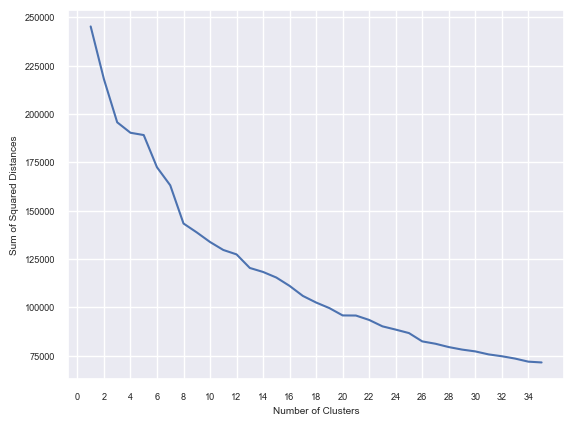

The knee point for the 29 dimension dataset is at k=13


In [50]:
# Calculate the sum of squared distances from each point to its closest mean for different values of k
sumDist = []
for k in range(1, 36):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(food_pca_29)
    sumDist.append(kmeans.inertia_)

# Use the KneeLocator class to find the knee point
knee = KneeLocator(range(1, 36), sumDist, curve='convex', direction='decreasing')

# Get the value of k at the knee point
k = knee.knee

plt.plot(range(1, 36), sumDist)
plt.xticks(np.arange(0, 36, step=2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

print("The knee point for the 29 dimension dataset is at k=" + str(k))

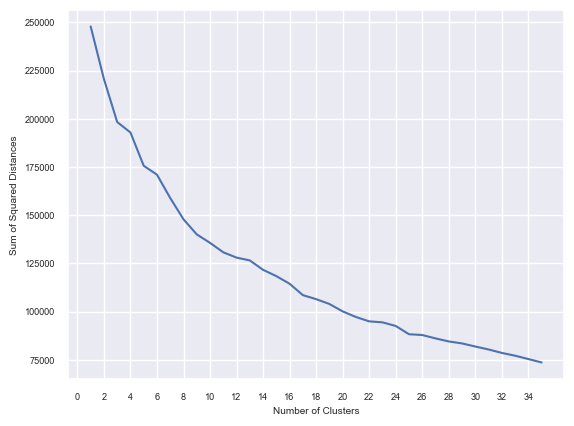

The knee point for the 35 dimension dataset is at k=9


In [51]:
# Calculate the sum of squared distances from each point to its closest mean for different values of k
sumDist = []
for k in range(1, 36):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(food_scaled)
    sumDist.append(kmeans.inertia_)

# Use the KneeLocator class to find the knee point
knee = KneeLocator(range(1, 36), sumDist, curve='convex', direction='decreasing')

# Get the value of k at the knee point
k = knee.knee

plt.plot(range(1, 36), sumDist)
plt.xticks(np.arange(0, 36, step=2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances")
plt.show()

print("The knee point for the 35 dimension dataset is at k=" + str(k))

From the above outputs, we can see that the optimal number of clusters for our PCA reduced dataset is actually more than for our 35-dimsnion dataset.
From this we can interpret that our reduced dataset has actually lost significant clustering power because we went from being able to cluster our dataset with 9 means to 13 means. 
We believe this lower value of 9 means is better because it tells us that the 35-dimension dataset needs fewer means to capture the variance within our data.

Thus, going foward we will use the unreduced 35-dimension dataset instead of the reduced 29-dimension dataset.

We now run K-Means clustering with the optimal number of clusters (9) on the 35-dimension dataset (without PCA dimensionality reduction).

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


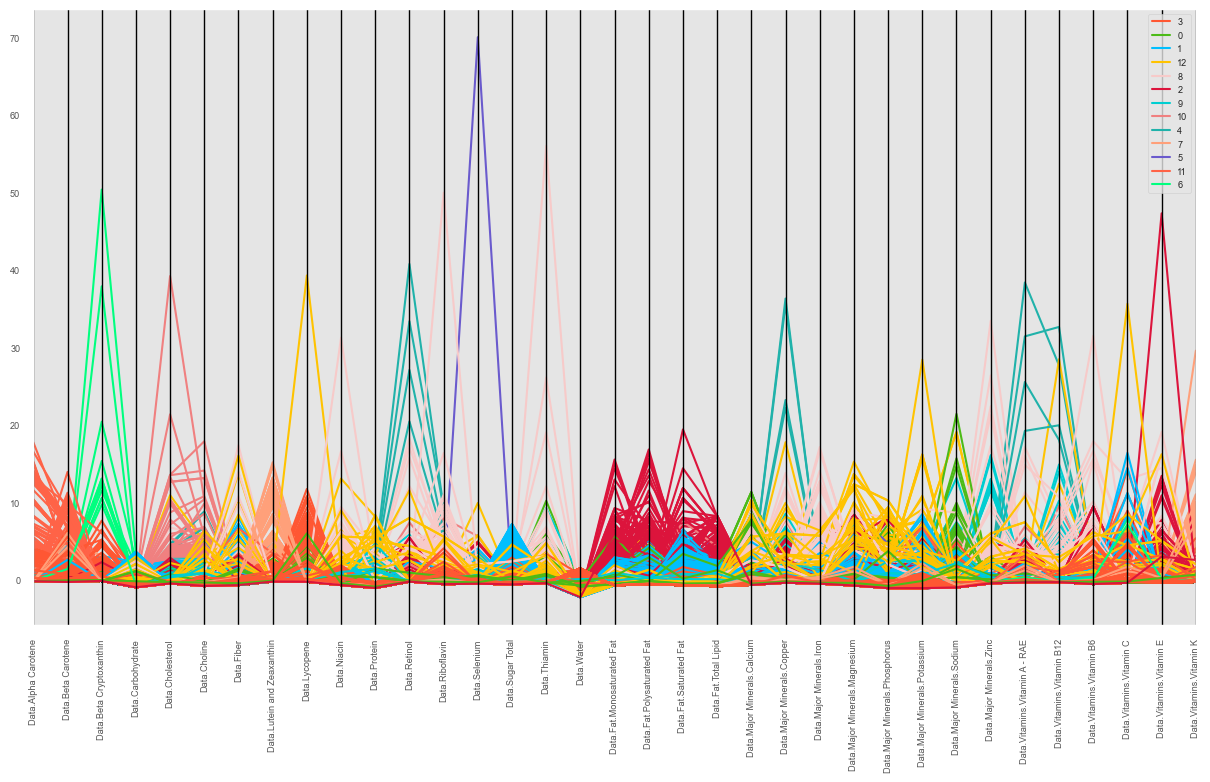

In [52]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
thirteen_means = KMeans(n_clusters=13, random_state=0).fit(food_scaled)




food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=thirteen_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#FF5733', '#4CBB17', '#00BFFF', '#FFC300','#F7CAC9','#DC143C','#00CED1','#F08080','#20B2AA','#FFA07A','#6A5ACD','#FF6347', '#00FF7F'))



K = 13 On PCA with 29 Dimensions

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


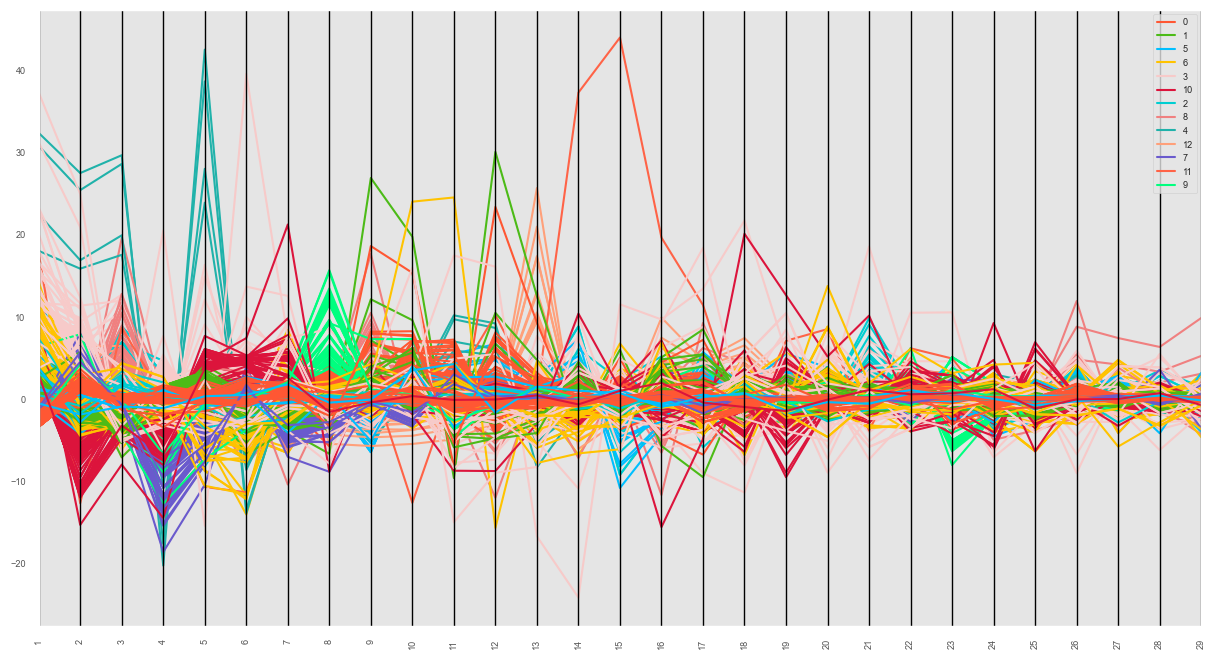

In [53]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
thirteen_means = KMeans(n_clusters=13, random_state=0).fit(food_pca_29)

clustered = pd.DataFrame(food_pca_29, columns = range(1,30) )
clustered['cluster']=thirteen_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    clustered, 'cluster',
    color=('#FF5733', '#4CBB17', '#00BFFF', '#FFC300','#F7CAC9','#DC143C','#00CED1','#F08080','#20B2AA','#FFA07A','#6A5ACD','#FF6347', '#00FF7F'))



We now run K-Means with k=2 on the full 35 dimensions dataset with a hypothesis it will cluster based on healthy and unhealthy foods  

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


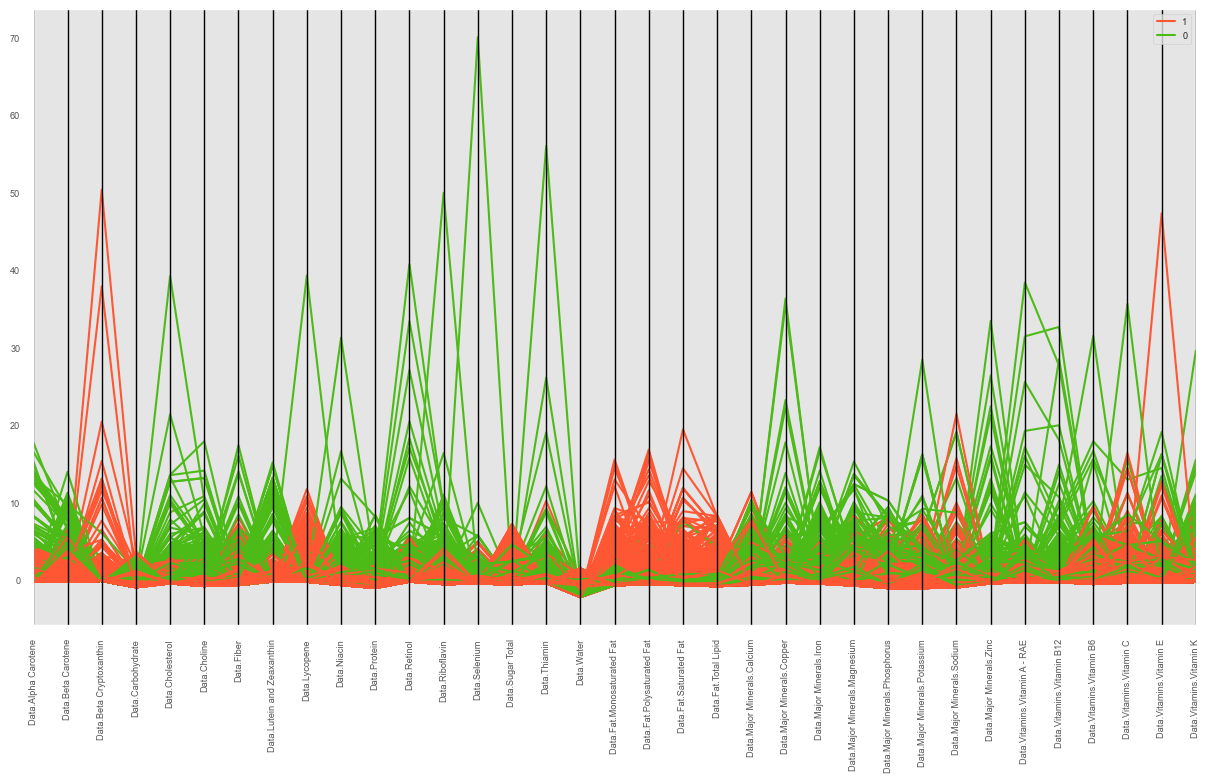

In [54]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
two_means = KMeans(n_clusters=2, random_state=0).fit(food_scaled)


food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=two_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#FF5733', '#4CBB17'))

In [55]:
#THIS IS CODE FOR GETTING ONLY ROWS FROM A CERTAIN CLUSTER, DO NOT DELETE THIS
#DO NOT DELETE THIS
df=food_scaled.loc[food_scaled['cluster']==3]
df

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,cluster


We now run K-Means with k=4 on the full 35 dimensions dataset with a hypothesis that it will cluster based on the 4 major food groups (Fruits & Vegetables, Grains, Protein Foods, and Dairy)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


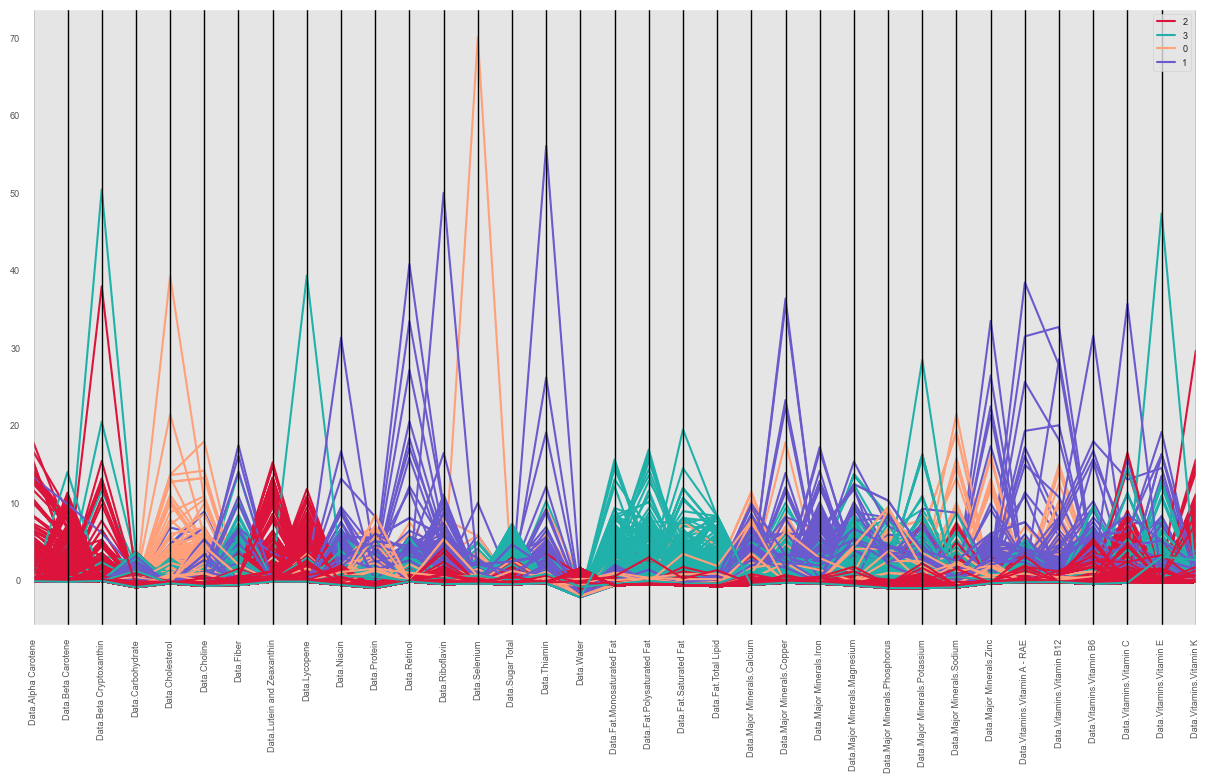

In [56]:
# Perform KMeans clustering with k=13
# fit the model to the feature data
four_means = KMeans(n_clusters=4, random_state=0).fit(food_scaled)


food_scaled = pd.DataFrame(food_scaled, columns = food.columns)
food_scaled['cluster']=four_means.labels_


with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    plt.xticks(rotation=90)
    pd.plotting.parallel_coordinates(
    food_scaled, 'cluster',
    color=('#DC143C','#20B2AA','#FFA07A','#6A5ACD'))

# Conclusions

## Bibliography


1. Whitcomb, R., Choi, J. M., &amp; Guan, B. (2021, October 15). Food CSV file. CORGIS Datasets Project. Retrieved March 24, 2023, from https://corgis-edu.github.io/corgis/csv/food/

2. Khan, U. M., Sevindik, M., Zarrabi, A., Nami, M., Ozdemir, B., Kaplan, D. N., Selamoglu, Z., Hasan, M., Kumar, M., Alshehri, M. M., &amp; Sharifi-Rad, J. (2021, November 19). Lycopene: Food sources, biological activities, and human health benefits. Oxidative medicine and cellular longevity. Retrieved March 24, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8626194/#:~:text=Red%20fruits%20and%20vegetables%20such,are%20important%20sources%20of%20lycopene.

3. Rousseau, N. (2017, February 17). Alpha-carotene or the secret to longevity: Louis Bonduelle Foundation. Fondation Louis Bonduelle. Retrieved March 24, 2023, from https://www.fondation-louisbonduelle.org/en/2016/10/13/alpha-carotene-or-the-secret-to-longevity/#:~:text=So%20add%20color%20to%20your,%2C%20cabbage%2C%20and%20green%20salad.

4. BJ;, B. (n.d.). Beta-cryptoxanthin as a source of vitamin A. Journal of the science of food and agriculture. Retrieved March 24, 2023, from https://pubmed.ncbi.nlm.nih.gov/25270992/#:~:text=Foods%20that%20are%20rich%20in,cell%2Dto%2Dcell%20communication.